<a href="https://colab.research.google.com/github/akifyavuzsoy/Voice-Recorgnition/blob/main/librosa_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sesin Öznitelik Çıkarımı — Librosa

## Kütüphaneler

In [ ]:
import librosa                                            # Ses Dosyasının Yüklenmesi
import librosa.display
import IPython.display as ipd                             # Ses Oynatılması
import matplotlib.pyplot as plt

## Ses Dosyasının Yüklenmesi

In [ ]:
ses = '/content/SI1894.WAV'
x, sr = librosa.load(ses)                                    # x -> ses zaman serisi  sr -> ses frekansı(Hz)
x_11025hz, sr_11025hz = librosa.load(ses,sr=11025)           # Frekans değiştitilerek yüklenebilir.

print("x type:", type(x), ", sr type:", type(sr))
print(x.shape,sr)

print("x_11025hz type:", type(x_11025hz), ", sr_11025hz type:", type(sr_11025hz))
print(x_11025hz.shape,sr_11025hz)


x type: <class 'numpy.ndarray'> , sr type: <class 'int'>
(64916,) 22050
x_11025hz type: <class 'numpy.ndarray'> , sr_11025hz type: <class 'int'>
(32458,) 11025


## Sesin Oynatılması

In [ ]:
ipd.Audio(ses)
ipd.Audio(x,rate=sr)

## Sesi Kaydetme

In [ ]:
#x, sr = librosa.load(librosa.util.example_audio_file())
#librosa.output.write_wav('ses_kayit.wav', x, sr)

## Sesi Görüntüleme

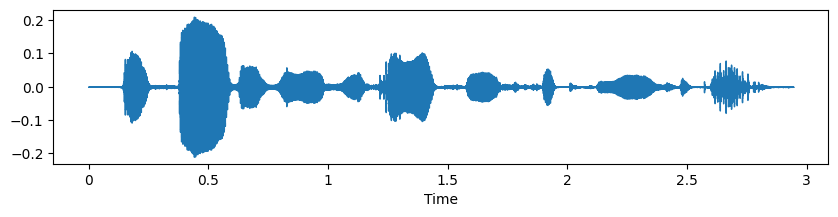

In [ ]:
plt.figure(figsize=(10,2))
librosa.display.waveshow(x,sr=sr)

## Feature Extraction - Öznitelik Çıkarımı

### Spektrogram

Spektrogram, belirli bir dalga formunda bulunan çeşitli frekanslarda bir sinyalin sinyal gücünü veya yüksekliğini temsil eden görseldir. Aynı zamanda enerji seviyelerini zaman içinde nasıl değiştiğini de gösterir.

* **Short Time Fourier Transform:** Ses sinyali işlemek için güçlü bir araçtır. Sinyaller için zamana ve frekansa göre karmaşık genliği belirten zaman frekansı dağılımını tanımlar.

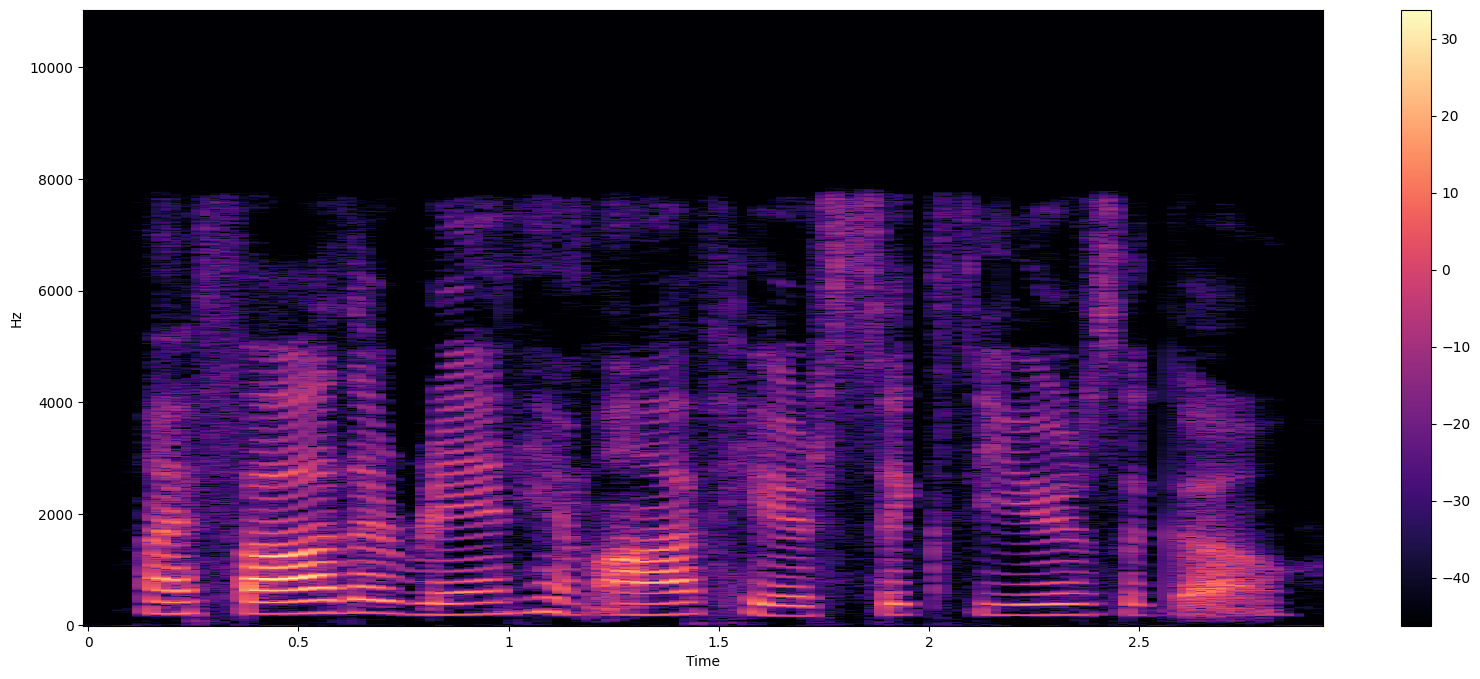

In [ ]:
stft = librosa.stft(x)                      # stft -> Short-time Fourier Transform
Xdb = librosa.amplitude_to_db(abs(stft))    # Genlik Desibel değeri

plt.figure(figsize=(20,8))
librosa.display.specshow(Xdb, sr=sr, x_axis="time", y_axis="hz")
plt.colorbar()

### Mel-Frekans Kepstral Katsayıları (Mel-Frequency Cepstral Coefficients - MFCC)
Mel frekans ölçeği, insan kulağının ses frekanslarındaki değişimi algılayışını gösteren bir ölçektir. MFCC(Mel-Frequency Cepstral Coefficients), ses sinyalinin kısa zamanlı güç spektrumunun Mel ölçeği üzerindeki ifadesidir.

* Frekanstan Mel ölçeğine dönüşüm formülü;

    M ═ 1125 × ln(1+(f÷700))

    M → Mel ölçeği

    f → Frekans(Hz)

(20, 127)


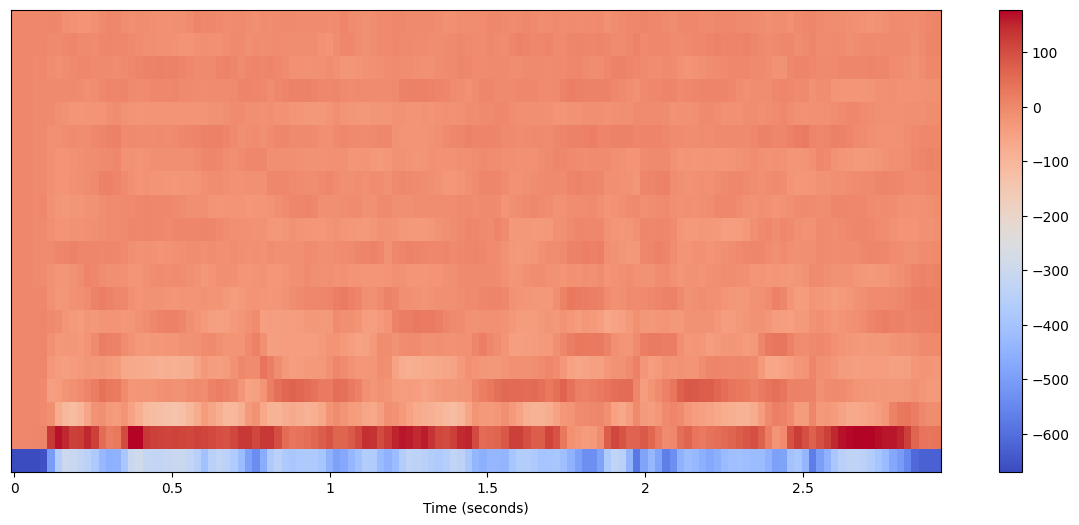

In [ ]:
mfcc = librosa.feature.mfcc(y=x, sr=sr)
print(mfcc.shape)

plt.figure(figsize=(15,6))
librosa.display.specshow(mfcc, x_axis="s")
plt.colorbar()

### Zero Crossing Rate

Zero crossing rate bir sinyalin sıfır çizgisinden geçişi yani işaret değişiminin oranıdır.

9320


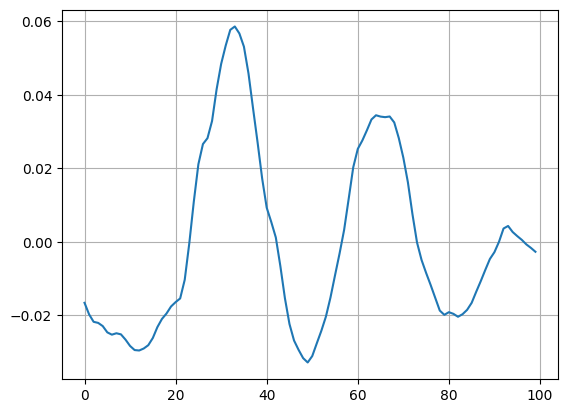

In [ ]:
zero_crossing = librosa.zero_crossings(x)
print(sum(zero_crossing))

plt.plot(x[5000:5100])
plt.grid()

### Spectral Centroid

Spekturumun kütle merkezinin nerede olduğunu gösterir

(1, 127)


Text(0, 0.5, 'Hz')

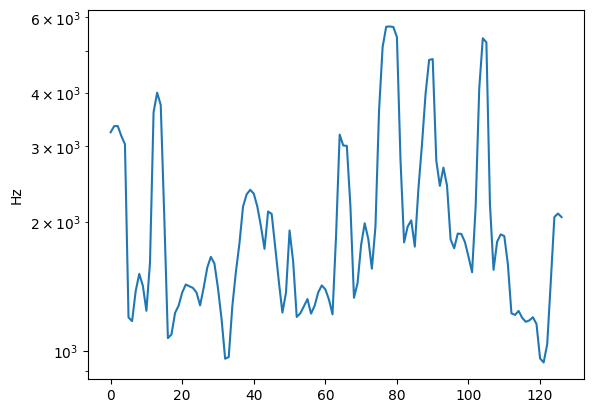

In [ ]:
spec_cent = librosa.feature.spectral_centroid(y=x)
print(spec_cent.shape)

plt.semilogy(spec_cent.T)
plt.ylabel("Hz")

### Spectral Rolloff

Sinyal şeklinin ölçüsü. Toplam spektral enerjisinin belli bir yüzdesini temsil eder.

(1, 127)


Text(0, 0.5, 'Hz')

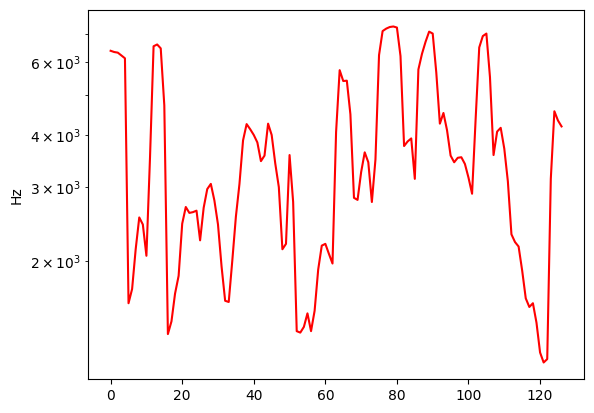

In [ ]:
spec_roll = librosa.feature.spectral_rolloff(y=x, sr=sr)
print(spec_roll.shape)

plt.semilogy(spec_roll.T, "r")
plt.ylabel("Hz")

### Chroma Frekansı

Spektrum müzikal oktavının 12 farklı yarı tonunu(chroma) temsil eden 12 parçanın belirtildiği ses için güçlü bir sunumudur.

(12, 127)


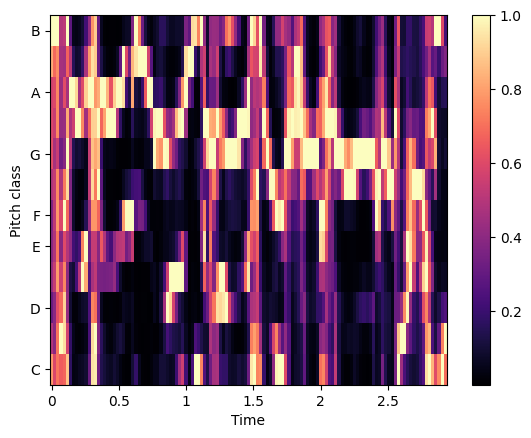

In [ ]:
chroma=librosa.feature.chroma_stft(y=x,sr=sr)
print(chroma.shape)

librosa.display.specshow(chroma,y_axis="chroma",x_axis="time")
plt.colorbar()

### Spektral Bant Genişliği

Ses sinyalinin dalga genişliğinin maksimum tepe noktasının yarısını tanımlar.

In [ ]:
spec_band=librosa.feature.spectral_bandwidth(y=x,sr=sr)
print(spec_band,spec_band.shape)

[[2431.28454825 2364.17279234 2325.10831542 2315.22136612 2242.77429754
  1267.42814217  966.77240025 1102.98456207 1176.138843   1173.4014116
  1192.15528461 1843.99327827 2429.49067776 2167.36317788 2184.29806939
  2060.2513838   980.95353568  870.35778309  950.21910062  973.87893164
  1047.32043599 1082.07705785 1068.32747433 1099.72615569 1193.5432968
  1237.02221473 1560.04168619 1608.17683768 1538.02221182 1361.91669952
  1160.93858129  996.24634664  901.28736609 1016.06504011  979.6253857
  1142.95020266 1370.17153661 1683.94682965 1780.86581236 1728.85726805
  1658.17962807 1654.51910671 1698.00981872 1911.94650751 2139.16680775
  2094.00792435 1914.05278149 1712.17831542 1356.81289818 1413.73707344
  1965.87109797 1897.6039947  1238.30524137 1121.90610173 1117.67593923
  1074.80667709  909.91403289 1014.99136374 1141.86831867 1158.49151686
  1072.26272657 1018.19229442 1093.59154451 1917.6843375  2142.54477977
  2051.26820837 1987.66173878 1943.68260143 1444.20447762 1418.8335